In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_Date = session.query(func.max(Measurement.date)).first()
recent_Date

('2017-08-23',)

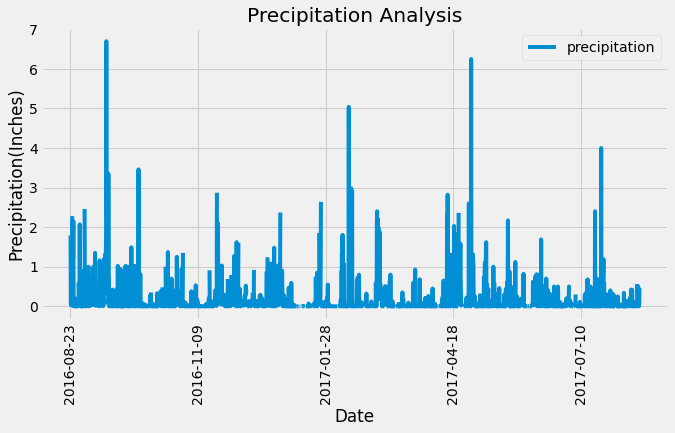

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearDate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
##yearDate

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= yearDate).all()
##scores

# Save the query results as a Pandas DataFrame and set the index to the date column
scoresDF = pd.DataFrame(scores, columns=['date','precipitation'])
##scoresDF

# Sort the dataframe by date
scoresDF = scoresDF.sort_values("date")
##scoresDF

# Use Pandas Plotting with Matplotlib to plot the data
scoresDF.plot(x='date', y='precipitation', rot=90, figsize=(10,5))
plt.title('Precipitation Analysis')
plt.xlabel('Date')
plt.ylabel('Precipitation(Inches)')
plt.legend(loc='upper right')
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scoresDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
len(session.query(Station.id).all())

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station).all()
station = []
for x in range(len(most_active)):
    station.append(most_active[x][0])
active_stations = pd.Series(station).value_counts()
df = pd.DataFrame(active_stations,columns=['Frequency'])
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.rename(columns={'index':'Station'},inplace=True)
most_active_station = df.loc[df['Frequency']==df['Frequency'].max()]['Station'][0]
print(df)
print("")
print(f"Most active station: {most_active_station}")

       Station  Frequency
0  USC00519281       2772
1  USC00519397       2724
2  USC00513117       2709
3  USC00519523       2669
4  USC00516128       2612
5  USC00514830       2202
6  USC00511918       1979
7  USC00517948       1372
8  USC00518838        511

Most active station: USC00519281


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
function = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
active = session.query(*function).filter(Measurement.station == most_active_station)
print(f"For most active station ({most_active_station}):")
print("")
print(f"Lowest Temperature (F): {active[0][0]} degrees")
print(f"Highest Temperature (F): {active[0][1]} degrees")
print(f"Average Temperature (F): {round(active[0][2],1)} degrees")

For most active station (USC00519281):

Lowest Temperature (F): 54.0 degrees
Highest Temperature (F): 85.0 degrees
Average Temperature (F): 71.7 degrees


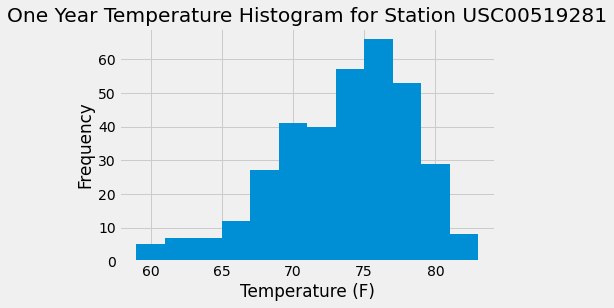

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

sel = [Measurement.tobs]

temp_year = session.query(*sel).\
    filter(Measurement.date >= yearDate).\
    filter(Measurement.station=='USC00519281')

temps = []
for x in range(len(temp_year.all())):
    temps.append(temp_year.all()[x][0])

temperatures = pd.Series(temps);
temperatures.plot.hist(bins=12);
plt.title("One Year Temperature Histogram for Station USC00519281");
plt.xlabel("Temperature (F)");


# Close session

In [16]:
# Close Session
session.close()